**import**

In [1]:
import os


from collections import Counter
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np 
import nest_asyncio #to avoid runtime issue
nest_asyncio.apply()
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
nltk.download('punkt') #contents a pre-trained Punkt tokenizer
from sklearn.decomposition import NMF
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.decomposition import PCA
import re 
import random 
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import twint
from sklearn.feature_extraction.text import TfidfVectorizer 
from unidecode import unidecode
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gladi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


**I. SCRAPPING**

In [2]:
__import__('IPython')

#c= twint.Config()
#c.Pandas = True #on intègre pandas à twint pour pouvoir générer le dataframe lié
#c.Search = "covid"
#c.Since ="2021-01-02"
#c.Until ="2021-12-30"
#c.Store_object = True
#c.Lang ='fr'
#c.Limit = 300000
#c.Store_csv = True
#c.Output = "Tweet-File"


#twint.run.Search(c)

<module 'IPython' from 'c:\\Users\\gladi\\anaconda3\\lib\\site-packages\\IPython\\__init__.py'>

**II. ANALYSE DESCRIPTIVE**

In [6]:
tweets = pd.read_csv(r'\Text Mining_Awa-Adrien_v1\tweets.csv')

In [7]:
tweets.shape

(291976, 36)

In [8]:
tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1476704653328982018,1476704653328982018,"2021-12-31 00:59:59 Paris, Madrid",2021-12-31,00:59:59,100,723528086650646528,unitedlanguage,UnitedLanguageGroup,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1476704652951437320,1476704652951437320,"2021-12-31 00:59:59 Paris, Madrid",2021-12-31,00:59:59,100,760010784,skincats,SKINCATS,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1476704652838285315,1476685813568217098,"2021-12-31 00:59:59 Paris, Madrid",2021-12-31,00:59:59,100,772407053042278400,leadwithgrace2,Grace,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Lonnie30johnson', 'name': 'L...",NaN,NaN,NaN,NaN
3,1476704652762755077,1476704652762755077,"2021-12-31 00:59:59 Paris, Madrid",2021-12-31,00:59:59,100,1196628753381830656,__westside,brian9,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1476704651970064388,1476704651970064388,"2021-12-31 00:59:59 Paris, Madrid",2021-12-31,00:59:59,100,930535104740503552,heddy_bel,Heddy,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [9]:
tweets.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [10]:
df = tweets[tweets['language']=='fr'] #nouveau dataframe avec seulement les tweets en français
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
4,1476704651970064388,1476704651970064388,"2021-12-31 00:59:59 Paris, Madrid",2021-12-31,00:59:59,100,930535104740503552,heddy_bel,Heddy,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
17,1476704645871456256,1476704645871456256,"2021-12-31 00:59:58 Paris, Madrid",2021-12-31,00:59:58,100,1362505386717310977,varientfr,Varient.,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
78,1476704610916130819,1476687606981312512,"2021-12-31 00:59:49 Paris, Madrid",2021-12-31,00:59:49,100,45556215,airnation,airnation,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'jyduclos', 'name': 'Jean-Yve...",NaN,NaN,NaN,NaN
93,1476704603857166342,1476021821493415946,"2021-12-31 00:59:48 Paris, Madrid",2021-12-31,00:59:48,100,3024437813,francie_allaire,Francie,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'multifestif', 'name': 'décor...",NaN,NaN,NaN,NaN
103,1476704597293023234,1476684441636544513,"2021-12-31 00:59:46 Paris, Madrid",2021-12-31,00:59:46,100,1947908845,pensesots,paul...,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ludovic_guerre', 'name': 'Lu...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291927,1476581853888974849,1476581853888974849,"2021-12-30 16:52:02 Paris, Madrid",2021-12-30,16:52:02,100,1322686770,maanonlvt,MAN🔛,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
291952,1476581841641607172,1476581841641607172,"2021-12-30 16:51:59 Paris, Madrid",2021-12-30,16:51:59,100,1206663043716923394,llmissnothingll,Arrogante,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
291958,1476581837971628041,1476581837971628041,"2021-12-30 16:51:58 Paris, Madrid",2021-12-30,16:51:58,100,4706605817,africanewsfr,Africanews Français,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
291959,1476581837912821768,1476581837912821768,"2021-12-30 16:51:58 Paris, Madrid",2021-12-30,16:51:58,100,833714077838999552,joestariku,Troubloïde,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [11]:
df.shape

(16530, 36)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16530 entries, 4 to 291964
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               16530 non-null  int64  
 1   conversation_id  16530 non-null  int64  
 2   created_at       16530 non-null  object 
 3   date             16530 non-null  object 
 4   time             16530 non-null  object 
 5   timezone         16530 non-null  int64  
 6   user_id          16530 non-null  int64  
 7   username         16530 non-null  object 
 8   name             16530 non-null  object 
 9   place            4 non-null      object 
 10  tweet            16530 non-null  object 
 11  language         16530 non-null  object 
 12  mentions         16530 non-null  object 
 13  urls             16530 non-null  object 
 14  photos           16530 non-null  object 
 15  replies_count    16530 non-null  int64  
 16  retweets_count   16530 non-null  int64  
 17  likes_count

In [13]:
df['word_titles'] = df['hashtags'].apply(lambda x: len(x.split())) #take a look the average number of hashtags in tweets
df.describe()

<ipython-input-13-566d28812b31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_titles'] = df['hashtags'].apply(lambda x: len(x.split())) #take a look the average number of hashtags in tweets


,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest,word_titles
count,1.653000e+04,1.653000e+04,16530.0,1.653000e+04,16530.000000,16530.000000,16530.000000,16530.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16530.000000
mean,1.476640e+18,1.476282e+18,100.0,6.657433e+17,1.287598,2.885662,12.941016,0.098488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.154567
std,3.406937e+13,7.751726e+15,0.0,6.141517e+17,13.980975,68.737465,341.606301,0.297982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.742074
min,1.476582e+18,9.312773e+17,100.0,2.656000e+03,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,1.476611e+18,1.476584e+18,100.0,9.225874e+08,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,1.476638e+18,1.476617e+18,100.0,8.442826e+17,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,1.476669e+18,1.476653e+18,100.0,1.269927e+18,1.000000,0.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
max,1.476705e+18,1.476705e+18,100.0,1.476612e+18,1153.000000,6021.000000,35878.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000


In [14]:
df['tweet'].head

<bound method NDFrame.head of 4         J’ai le covid demain c’est le nouvel an et l’a...
17        Flash - Le port du #Masque redevient #obligato...
78        @jyduclos Nul en maudit  alors grosso modo  1 ...
93        @multifestif @drainvillepm Ils n'ont qu'à soig...
103       @ludovic_guerre @bourdia_sophian @CNEWS stupid...
                                ...                        
291927    Les bandeurs de la gestion chinoise du covid l...
291952    L'université qui dit de se faire tester au moi...
291958    #CAN2021 : le Nigérian Victor #Osimhen positif...
291959    Le covid et Twitter c'est fascinant franchemen...
291964    @GDarmanin Le peuple  n en peut plus de votre ...
Name: tweet, Length: 16530, dtype: object>

In [15]:
df.isna().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              16526
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          15286
video                  0
thumbnail          14902
near               16530
geo                16530
source             16530
user_rt_id         16530
user_rt            16530
retweet_id         16530
reply_to               0
retweet_date       16530
translate          16530
trans_src          16530
trans_dest         16530
word_titles            0
dtype: int64

In [16]:
df = df.dropna(axis=1) #removing nan
df.reset_index(drop=True, inplace=True)

In [17]:
df.isna().sum()

id                 0
conversation_id    0
created_at         0
date               0
time               0
timezone           0
user_id            0
username           0
name               0
tweet              0
language           0
mentions           0
urls               0
photos             0
replies_count      0
retweets_count     0
likes_count        0
hashtags           0
cashtags           0
link               0
retweet            0
video              0
reply_to           0
word_titles        0
dtype: int64

In [18]:
#pd.options.display.max_rows = None
#pd.options.display.max_colwidth = None

corpus = list(df['tweet'])
#print(corpus)

In [19]:
len(corpus)

16530

In [20]:
type(corpus)

list

In [21]:
i = 1

for doc in corpus:
    print(f"Le document {i} est de longueur : {len(doc)}")
    i+=1

Le document 1 est de longueur : 86
Le document 2 est de longueur : 122
Le document 3 est de longueur : 233
Le document 4 est de longueur : 67
Le document 5 est de longueur : 312
Le document 6 est de longueur : 27
Le document 7 est de longueur : 113
Le document 8 est de longueur : 157
Le document 9 est de longueur : 277
Le document 10 est de longueur : 25
Le document 11 est de longueur : 124
Le document 12 est de longueur : 121
Le document 13 est de longueur : 276
Le document 14 est de longueur : 289
Le document 15 est de longueur : 77
Le document 16 est de longueur : 200
Le document 17 est de longueur : 117
Le document 18 est de longueur : 163
Le document 19 est de longueur : 280
Le document 20 est de longueur : 162
Le document 21 est de longueur : 205
Le document 22 est de longueur : 45
Le document 23 est de longueur : 245
Le document 24 est de longueur : 277
Le document 25 est de longueur : 175
Le document 26 est de longueur : 127
Le document 27 est de longueur : 23
Le document 28 es

**III. PREPROCESSING**

In [22]:
#Tokeninzination
def hashtags(corpus):
    i = 1

    for doc in corpus:
        #liste_mots= word_tokenize(doc)
        #liste_mots = re.split('\W+',doc)
        hash= re.findall(r"#(\w+)", doc)
        print(f"Le document {i} contient {len(hash)} mots")
        print(f"La liste de mots du documents {i} : {hash} \n")
        i+=1
    return hash

print(hashtags(corpus))

Le document 1 contient 0 mots
La liste de mots du documents 1 : [] 

Le document 2 contient 7 mots
La liste de mots du documents 2 : ['Masque', 'obligatoire', 'departents', 'france', 'Covid_19', 'COVID19France', 'COVID19'] 

Le document 3 contient 2 mots
La liste de mots du documents 3 : ['Covid_19', 'Covid_19'] 

Le document 4 contient 0 mots
La liste de mots du documents 4 : [] 

Le document 5 contient 0 mots
La liste de mots du documents 5 : [] 

Le document 6 contient 0 mots
La liste de mots du documents 6 : [] 

Le document 7 contient 1 mots
La liste de mots du documents 7 : ['covidenfrance'] 

Le document 8 contient 0 mots
La liste de mots du documents 8 : [] 

Le document 9 contient 0 mots
La liste de mots du documents 9 : [] 

Le document 10 contient 0 mots
La liste de mots du documents 10 : [] 

Le document 11 contient 0 mots
La liste de mots du documents 11 : [] 

Le document 12 contient 0 mots
La liste de mots du documents 12 : [] 

Le document 13 contient 0 mots
La liste de

In [23]:
if doc.isdigit() in corpus :
    print(doc)
else : 
    print("Tous les documents sont de type string")

Tous les documents sont de type string


In [24]:
stopWords = ['a', 'abord', 'absolument', 'afin', 'ah', 'ai', 'aie', 'ailleurs', 'ainsi', 'ait', 'allaient', 'allo', 'allons', 
             'allô', 'alors', 'anterieur', 'anterieure', 'anterieures', 'apres', 'après', 'as', 'assez', 'attendu', 'au', 
             'aucun', 'aucune', 'aujourd', "aujourd'hui", 'aupres', 'auquel', 'aura', 'auraient', 'aurait', 'auront', 'aussi', 
             'autre', 'autrefois', 'autrement', 'autres', 'autrui', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 
             'avant', 'avec', 'avoir', 'avons', 'ayant', 'bah', 'bas', 'basee', 'bat', 'beau', 'beaucoup', 'bien', 'bigre', 'boum', 
             'bravo', 'brrr', "c'", 'car', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là', 
             'celui', 'celui-ci', 'celui-là', 'cent', 'cependant', 'certain', 'certaine', 'certaines', 'certains', 'certes', 'ces', 
             'cet', 'cette', 'ceux', 'ceux-ci', 'ceux-là', 'chacun', 'chacune', 'chaque', 'cher', 'chers', 'chez', 'chiche', 'chut', 
             'chère', 'chères', 'ci', 'cinq', 'cinquantaine', 'cinquante', 'cinquantième', 'cinquième', 'clac', 'clic', 'combien', 
             'comme', 'comment', 'comparable', 'comparables', 'compris', 'concernant', 'contre', 'couic', 'crac', 'c’', "d'", 'da', 
             'dans', 'de', 'debout', 'dedans', 'dehors', 'deja', 'delà', 'depuis', 'dernier', 'derniere', 'derriere', 'derrière', 
             'des', 'desormais', 'desquelles', 'desquels', 'dessous', 'dessus', 'deux', 'deuxième', 'deuxièmement', 'devant', 'devers', 
             'devra', 'different', 'differentes', 'differents', 'différent', 'différente', 'différentes', 'différents', 'dire', 
             'directe', 'directement', 'dit', 'dite', 'dits', 'divers', 'diverse', 'diverses', 'dix', 'dix-huit', 'dix-neuf', 
             'dix-sept', 'dixième', 'doit', 'doivent', 'donc', 'dont', 'douze', 'douzième', 'dring', 'du', 'duquel', 'durant', 'dès', 
             'désormais', 'd’', 'effet', 'egale', 'egalement', 'egales', 'eh', 'elle', 'elle-même', 'elles', 'elles-mêmes', 'en', 
             'encore', 'enfin', 'entre', 'envers', 'environ', 'es', 'est', 'et', 'etaient', 'etais', 'etait', 'etant', 'etc', 'etre', 
             'eu', 'euh', 'eux', 'eux-mêmes', 'exactement', 'excepté', 'extenso', 'exterieur', 'fais', 'faisaient', 'faisant', 'fait', 
             'façon', 'feront', 'fi', 'flac', 'floc', 'font', 'gens', 'ha', 'hein', 'hem', 'hep', 'hi', 'ho', 'holà', 'hop', 'hormis', 
             'hors', 'hou', 'houp', 'hue', 'hui', 'huit', 'huitième', 'hum', 'hurrah', 'hé', 'hélas', 'i', 'il', 'ils', 'importe', 
             "j'", 'je', 'jusqu', 'jusque', 'juste', 'j’', "l'", 'la', 'laisser', 'laquelle', 'las', 'le', 'lequel', 'les', 
             'lesquelles', 'lesquels', 'leur', 'leurs', 'longtemps', 'lors', 'lorsque', 'lui', 'lui-meme', 'lui-même', 'là', 'lès', 'l’', 
             "m'", 'ma', 'maint', 'maintenant', 'mais', 'malgre', 'malgré', 'maximale', 'me', 'meme', 'memes', 'merci', 'mes', 'mien', 'mienne', 
             'miennes', 'miens', 'mille', 'mince', 'minimale', 'moi', 'moi-meme', 'moi-même', 'moindres', 'moins', 'mon', 
             'moyennant', 'même', 'mêmes', 'm’', "n'", 'na', 'naturel', 'naturelle', 'naturelles', 'ne', 'neanmoins', 'necessaire', 
             'necessairement', 'neuf', 'neuvième', 'ni', 'nombreuses', 'nombreux', 'non', 'nos', 'notamment', 'notre', 'nous', 'nous-mêmes', 
             'nouveau', 'nul', 'néanmoins', 'nôtre', 'nôtres', 'n’', 'o', 'oh', 'ohé', 'ollé', 'olé', 'on', 'ont', 'onze', 'onzième', 'ore', 
             'ou', 'ouf', 'ouias', 'oust', 'ouste', 'outre', 'ouvert', 'ouverte', 'ouverts', 'où', 'paf', 'pan', 'par', 'parce', 'parfois', 
             'parle', 'parlent', 'parler', 'parmi', 'parseme', 'partant', 'particulier', 'particulière', 'particulièrement', 'pas', 'passé', 
             'pendant', 'pense', 'permet', 'personne', 'peu', 'peut', 'peuvent', 'peux', 'pff', 'pfft', 'pfut', 'pif', 'pire', 'plein', 'plouf', 
             'plus', 'plusieurs', 'plutôt', 'possessif', 'possessifs', 'possible', 'possibles', 'pouah', 'pour', 'pourquoi', 'pourrais', 'pourrait', 
             'pouvait', 'prealable', 'precisement', 'premier', 'première', 'premièrement', 'pres', 'probable', 'probante', 'procedant', 'proche', 
             'près', 'psitt', 'pu', 'puis', 'puisque', 'pur', 'pure', "qu'", 'quand', 'quant', 'quant-à-soi', 'quanta', 'quarante', 'quatorze', 
             'quatre', 'quatre-vingt', 'quatrième', 'quatrièmement', 'que', 'quel', 'quelconque', 'quelle', 'quelles', "quelqu'un", 'quelque', 
             'quelques', 'quels', 'qui', 'quiconque', 'quinze', 'quoi', 'quoique', 'qu’', 'rare', 'rarement', 'rares', 'relative', 'relativement', 
             'remarquable', 'rend', 'rendre', 'restant', 'reste', 'restent', 'restrictif', 'retour', 'revoici', 'revoilà', 'rien', "s'", 'sa', 
             'sacrebleu', 'sait', 'sans', 'sapristi', 'sauf', 'se', 'sein', 'seize', 'selon', 'semblable', 'semblaient', 'semble', 'semblent', 
             'sent', 'sept', 'septième', 'sera', 'seraient', 'serait', 'seront', 'ses', 'seul', 'seule', 'seulement', 'si', 'sien', 'sienne', 
             'siennes', 'siens', 'sinon', 'six', 'sixième', 'soi', 'soi-même', 'soit', 'soixante', 'son', 'sont', 'sous', 'souvent', 'specifique', 
             'specifiques', 'speculatif', 'stop', 'strictement', 'subtiles', 'suffisant', 'suffisante', 'suffit', 'suis', 'suit', 'suivant', 
             'suivante', 'suivantes', 'suivants', 'suivre', 'superpose', 'sur', 'surtout', 's’', "t'", 'ta', 'tac', 'tant', 'tardive', 'te', 
             'tel', 'telle', 'tellement', 'telles', 'tels', 'tenant', 'tend', 'tenir', 'tente', 'tes', 'tic', 'tien', 'tienne', 'tiennes', 
             'tiens', 'toc', 'toi', 'toi-même', 'ton', 'touchant', 'toujours', 'tous', 'tout', 'toute', 'toutefois', 'toutes', 'treize', 'trente', 
             'tres', 'trois', 'troisième', 'troisièmement', 'trop', 'très', 'tsoin', 'tsouin', 'tu', 'té', 't’', 'un', 'une', 'unes', 
             'uniformement', 'unique', 'uniques', 'uns', 'va', 'vais', 'vas', 'vers', 'via', 'vif', 'vifs', 'vingt', 'vivat', 'vive', 'vives', 
             'vlan', 'voici', 'voilà', 'vont', 'vos', 'votre', 'vous', 'vous-mêmes', 'vu', 'vé', 'vôtre', 'vôtres', 'zut', 'à', 'â', 'ça', 'ès', 
             'étaient', 'étais', 'était', 'étant', 'été', 'être', 'ô','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 
             'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'qu']

stopWords = [unidecode(sw) for sw in stopWords]

# Création du stemmer
stemmer = SnowballStemmer('french')

In [25]:
#-------------------------Creation of  functions for cleanning process-----------------------#

#find the hashtags 
def hashtags(tweet):
  hash = re.findall(r"#(\w+)", tweet)
  return hash

#remove username et @username
def remove_users(tweet):
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) 
    # remove tweeted at
    return tweet

#remove les links 
def remove_links(tweet):
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # remove bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

#remove non-ascii chars
def non_ascii(s):
    return "".join(i for i in s if ord(i)<128)

#lower case
def lower(doc):
    return doc.lower()

#remove les caractères spéciaux
def remove_special_characters(tweet):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\»\s]' 
    return re.sub(pat, '', tweet)

#remove stop words
def removeStopWords(str, stopWords):
    new_tweet = ' '.join([word for word in str.split() if word not in stopWords]) 
    return new_tweet

#remove email address
def email_address(doc):
    email = re.compile(r'[\w\.-]+@[\w\.-]+')
    return email.sub(r'',doc)

#remove blank space and special caracters
def punct(tweet):
    token=RegexpTokenizer(r'\w+')#regex
    tweet = token.tokenize(tweet)
    tweet= " ".join(tweet)
    return tweet 

#remove digits
def remove_digits(tweet):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', tweet)



In [26]:
#--------------------Test cleaning on a sample-------------------------#

sample = "je n'AIME pas ce ,^ #film$**LO-VE-LY@awatra http:www.awa.com awatra@gmail.com  : ;  ?!   123    ok"
punct(sample)

'je n AIME pas ce film LO VE LY awatra http www awa com awatra gmail com 123 ok'

In [27]:
#apply the functions to the dataframe 

df['hashtag'] = df.tweet.apply(func = hashtags)

#begin cleaning

df['new_tweet'] = df.tweet.apply(func = remove_users)
df['new_tweet'] = df.tweet.apply(func = remove_links)
df['new_tweet'] = df.tweet.apply(func = non_ascii)
df['new_tweet'] = df.tweet.apply(func = lower)
df['new_tweet'] = df.new_tweet.apply(func = email_address)
df['new_tweet'] = df.new_tweet.apply(func = removeStopWords , stopWords=stopWords)
df['new_tweet'] = df.new_tweet.apply(func = punct)
df['new_tweet'] = df.new_tweet.apply(func = remove_links)
df['new_tweet'] = df.new_tweet.apply(func = remove_digits)
df['new_tweet'] = df.new_tweet.apply(func = remove_special_characters)

<ipython-input-27-50960c28b6aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hashtag'] = df.tweet.apply(func = hashtags)
<ipython-input-27-50960c28b6aa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_tweet'] = df.tweet.apply(func = remove_users)
<ipython-input-27-50960c28b6aa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [28]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'tweet', 'language', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'video', 'reply_to', 'word_titles',
       'hashtag', 'new_tweet'],
      dtype='object')

In [29]:
df['new_tweet'][12]

'plus observe composants vaccins covid voir composants d on n est jamais entendu nom avez dj entendu polyethynelgenycol non pourtant all cole mdecine vrit faut rependre partout'

**IV. Normalisation**

In [30]:
stemmer = SnowballStemmer('french') # initialiser le stemmer en français

corpus1 = [" ".join([stemmer.stem(word) for word in doc.split()]) for doc in df['new_tweet']]

**V. VISUALISATION**

Text(0.5, 1.0, 'Distribution of number of words in covid hashtags')

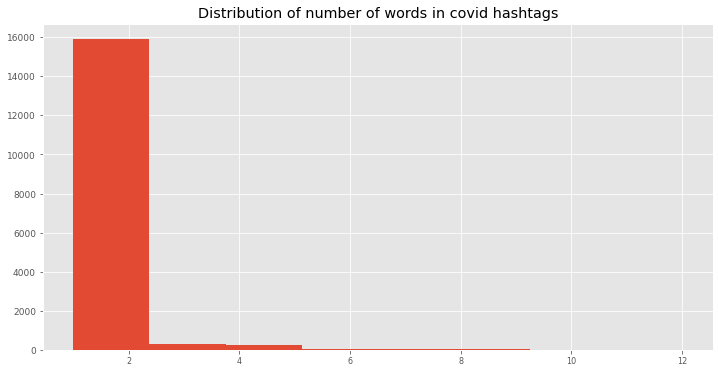

In [31]:
df[['word_titles']].hist(figsize=(12,6), bins=8, xlabelsize=8, ylabelsize=9);
plt.title("Distribution of number of words in covid hashtags")

Text(0.5, 1.0, 'Répartition du nombre de mots par tweet')

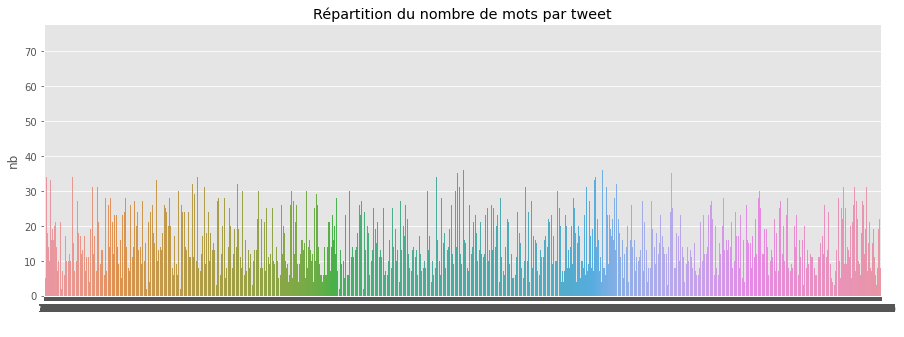

In [32]:
plt.figure(figsize=(15,5))


corp = [len(doc.split()) for doc in corpus1]
corp

index=list(range(len(corp)))


plot = sns.barplot(x=index,y=corp, data=df)
    
plt.xlabel(' ')
plt.ylabel("nb")
plt.title("Répartition du nombre de mots par tweet") 

Text(0.5, 1.0, 'Top 20 bigrammes catégorie')

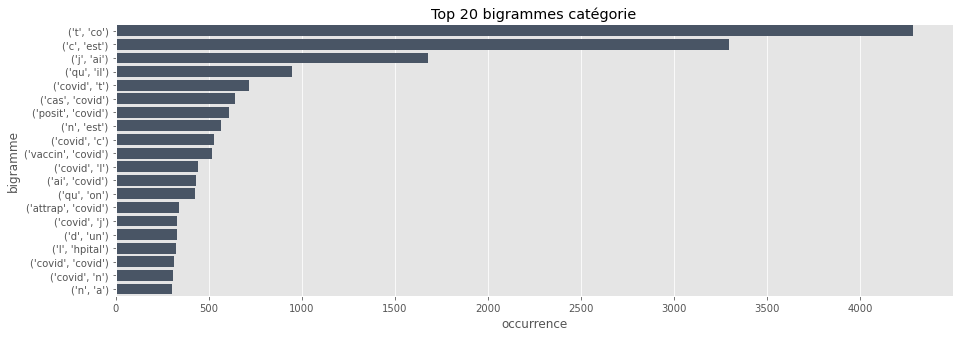

In [33]:

# Tokenisation des articles
corpus = [doc for doc in corpus1]
list_tokens = ' '.join(corpus).split()

# Identification et décompte des bigrams
list_bigrams = list(ngrams(list_tokens, 2)) 
counter = Counter(list_bigrams)

# Création d'un dataframe contenant le top 20 bigramme les plus fréquents
df_plot = pd.DataFrame(counter.most_common(20))

# Création du graphique
plt.figure(figsize=(15,5))

plot = sns.barplot(x=df_plot[1], 
                    y=df_plot[0],
                    color='#44546a')

plt.xlabel('occurrence')
plt.ylabel("bigramme")
plt.title("Top 20 bigrammes catégorie") 

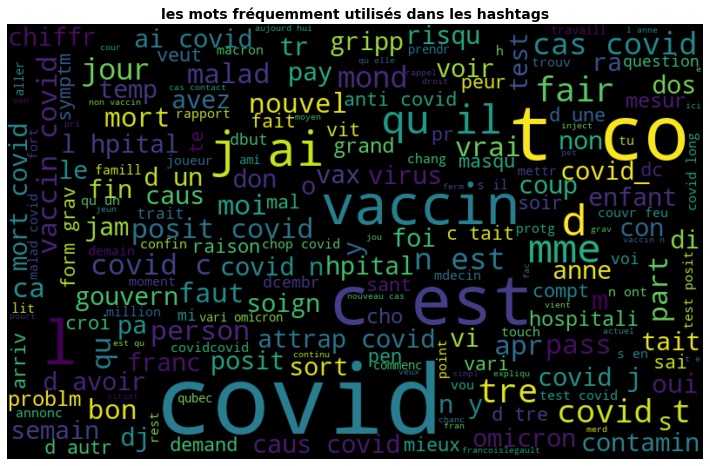

In [34]:
all_words = ''.join([word for word in corpus1[0:10000]])
all_words 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("les mots fréquemment utilisés dans les hashtags", weight='bold', fontsize=14)
plt.show()

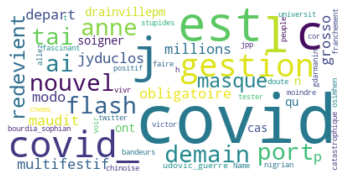

In [35]:
#-------------------most usefull hashtags------------------#
text = str(df.new_tweet)
wordcloud = WordCloud().generate(text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=80, max_words=60, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show() 

**VI. TOPIC MODELLING**

In [36]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stopWords)

In [37]:
dtm = vectorizer.fit_transform(df['new_tweet'].values.astype('U')) # U convert the data set to unicode
dtm

c:\Users\gladi\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn(


<16530x13066 sparse matrix of type '<class 'numpy.float64'>'
	with 157353 stored elements in Compressed Sparse Row format>

In [38]:
words = np.array(vectorizer.get_feature_names()) #visualising the number of feature the vectorizer gets
print(len(words)) 

13066


c:\Users\gladi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
nmf_mod = NMF(n_components=10,random_state=42) #estimatte the topic model of the dataset 
nmf_mod.fit(dtm)

c:\Users\gladi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=10, random_state=42)

In [40]:
for index, topic in enumerate(nmf_mod.components_):
  print(f"The TOP 10 words for Topic#{index}")
  print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])

The TOP 10 words for Topic#0
['contaminations', 'nouvelles', 'obligatoire', 'anti', 'covid_', 'variant', 'masque', 'france', 'omicron', 'co']
The TOP 10 words for Topic#1
['grippe', 'bon', 'vacciner', 'oui', 'cause', 'faut', 'aprs', 'ans', 'tre', 'faire']
The TOP 10 words for Topic#2


c:\Users\gladi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['coup', 'vois', 'autour', 'million', 'impression', 'tt', 'attrape', 'wsh', 'moment', 'monde']
The TOP 10 words for Topic#3
['anne', 'veille', 'soire', 'cause', 'rveillon', 'jour', 'ouvel', 'passer', 'an', 'nouvel']
The TOP 10 words for Topic#4
['jour', 'bordeaux', 'positifs', 'nombre', 'dcs', 'heures', 'france', 'contact', 'nouveaux', 'cas']
The TOP 10 words for Topic#5
['ranimation', 'soins', 'ouestfrance', 'face', 'mdecins', 'colre', 'arrivent', 'hpital', 'patients', 'vaccins']
The TOP 10 words for Topic#6
['tait', 'anne', 'jours', 'gatif', 'swag', 'jovic', 'pcr', 'ngatif', 'test', 'positif']
The TOP 10 words for Topic#7
['personnes', 'risque', 'attraper', 'empche', 'quatrime', 'isral', 'doses', 'anti', 'dose', 'vaccin']
The TOP 10 words for Topic#8
['personnes', 'sortir', 'wsh', 'mdr', 'veut', 'tait', 'sais', 'chose', 'temps', 'mme']
The TOP 10 words for Topic#9
['chopp', 'fou', 'wsh', 'vraiment', 'masque', 'jsuis', 'contact', 'dbut', 'autant', 'jamais']


In [41]:
df_topics = nmf_mod.transform(dtm) #combine topics with the original data

In [42]:
df_topics[1].argsort()

array([3, 5, 6, 7, 8, 2, 1, 9, 4, 0], dtype=int64)

In [43]:
df_topics[1].argmax()#index position of the most representative topic

0

In [44]:
bbc_topiclabels = {0:'vaccin en israel',
                   1:'sentiments',
                   2:'impressions',
                   3:'augmentation contaminations dans le monde',
                   4:"fêtes de fin d'année période covid",
                   5:'nouveaux cas, Bordeaux, Quebec  ',
                   6:'colère médecin ouest France',
                   7:'tests PCR',
                   8:'période de grippe',
                   9:'masque obligatoire, omicron, covid'
                  }

In [45]:
df['hash'] = df_topics.argmax(axis=1)

<ipython-input-45-6c13aa63b2c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hash'] = df_topics.argmax(axis=1)


In [46]:
df['topic_label'] = df['hash'].map(bbc_topiclabels)#each hashtag refers to which the topic?

<ipython-input-46-c7a415c628bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic_label'] = df['hash'].map(bbc_topiclabels)#each hashtag refers to which the topic?


In [47]:
df2=df.groupby('hash').count()
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,cashtags,link,retweet,video,reply_to,word_titles,hashtag,new_tweet,hash,topic_label
0,1476704651970064388,1476704651970064388,"2021-12-31 00:59:59 Paris, Madrid",2021-12-31,00:59:59,100,930535104740503552,heddy_bel,Heddy,J’ai le covid demain c’est le nouvel an et l’a...,...,[],https://twitter.com/Heddy_bel/status/147670465...,False,0,[],1,[],j ai covid demain c est nouvel an l anne j tai...,3,augmentation contaminations dans le monde
1,1476704645871456256,1476704645871456256,"2021-12-31 00:59:58 Paris, Madrid",2021-12-31,00:59:58,100,1362505386717310977,varientfr,Varient.,Flash - Le port du #Masque redevient #obligato...,...,[],https://twitter.com/Varientfr/status/147670464...,False,0,[],7,"[Masque, obligatoire, departents, france, Covi...",flash port masque redevient obligatoire depart...,0,vaccin en israel
2,1476704610916130819,1476687606981312512,"2021-12-31 00:59:49 Paris, Madrid",2021-12-31,00:59:49,100,45556215,airnation,airnation,@jyduclos Nul en maudit alors grosso modo 1 ...,...,[],https://twitter.com/airnation/status/147670461...,False,0,"[{'screen_name': 'jyduclos', 'name': 'Jean-Yve...",2,"[Covid_19, Covid_19]",jyduclos maudit grosso modo millions covid_ p...,6,colère médecin ouest France
3,1476704603857166342,1476021821493415946,"2021-12-31 00:59:48 Paris, Madrid",2021-12-31,00:59:48,100,3024437813,francie_allaire,Francie,@multifestif @drainvillepm Ils n'ont qu'à soig...,...,[],https://twitter.com/francie_allaire/status/147...,False,0,"[{'screen_name': 'multifestif', 'name': 'décor...",1,[],multifestif drainvillepm n ont qu soigner cas...,4,fêtes de fin d'année période covid
4,1476704597293023234,1476684441636544513,"2021-12-31 00:59:46 Paris, Madrid",2021-12-31,00:59:46,100,1947908845,pensesots,paul...,@ludovic_guerre @bourdia_sophian @CNEWS stupid...,...,[],https://twitter.com/pensesots/status/147670459...,False,0,"[{'screen_name': 'ludovic_guerre', 'name': 'Lu...",1,[],udovic_guerre bourdia_sophian cnews stupides h...,8,période de grippe


In [48]:
df2

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,hashtags,cashtags,link,retweet,video,reply_to,word_titles,hashtag,new_tweet,topic_label
hash,,,,,,,,,,,,,,,,,,,,,
0,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609,...,2609,2609,2609,2609,2609,2609,2609,2609,2609,2609
1,5525,5525,5525,5525,5525,5525,5525,5525,5525,5525,...,5525,5525,5525,5525,5525,5525,5525,5525,5525,5525
2,691,691,691,691,691,691,691,691,691,691,...,691,691,691,691,691,691,691,691,691,691
3,651,651,651,651,651,651,651,651,651,651,...,651,651,651,651,651,651,651,651,651,651
4,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,...,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441
5,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,...,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033
6,860,860,860,860,860,860,860,860,860,860,...,860,860,860,860,860,860,860,860,860,860
7,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,...,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515
8,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,...,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492


**VII CLUSTERING**

In [49]:
dtm.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Text(0.5, 1.0, 'PCA')

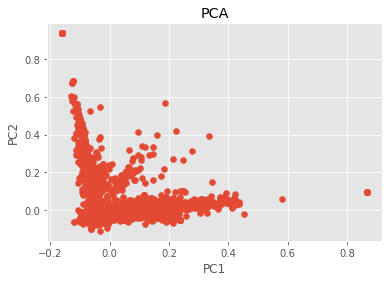

In [50]:
#PCA
pca=PCA(n_components=2).fit(dtm.toarray())
X_pca=pca.transform(dtm.toarray())
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")

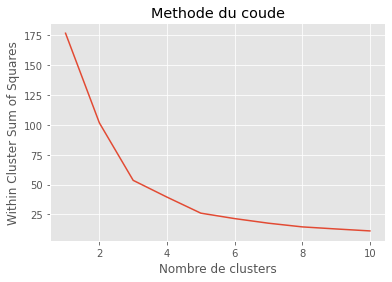

In [51]:
#Determination du nombre optimal de cluster
wcss=[]

for i in range(1,11):
    model= KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    model.fit(X_pca)
    wcss.append(model.inertia_)

#Graphique coude
plt.plot(range(1,11),wcss)
plt.title("Methode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.show()

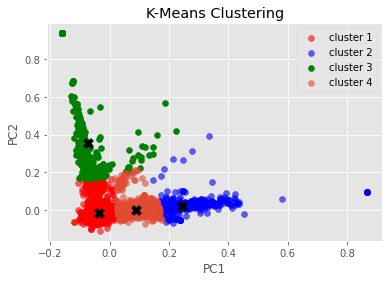

In [52]:
kmeans=KMeans(n_clusters=4).fit(X_pca)
y_pred=kmeans.predict(X_pca)

plt.scatter(X_pca[y_pred==0,0],y=X_pca[y_pred==0,1],c='red',alpha=0.6,label="cluster 1")
plt.scatter(X_pca[y_pred==1,0],y=X_pca[y_pred==1,1],c='blue',alpha=0.6,label="cluster 2")
plt.scatter(X_pca[y_pred==2,0],y=X_pca[y_pred==2,1],c='green',label="cluster 3")
plt.scatter(X_pca[y_pred==3,0],y=X_pca[y_pred==3,1],alpha=0.6,label="cluster 4")

plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],s=100,c="k",marker="X")
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering")

plt.show()